In [3]:
pip install pygame

     |████████████████████████████████| 11.8MB 5.1MB/s 


In [4]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os as os
import sys as sys
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
# set SDL to use the dummy NULL video driver, 
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
mounted_drive = '/content/drive/MyDrive/'
os.chdir(mounted_drive)

In [14]:
os.listdir('/content/drive/MyDrive/images')

['enemy.png', 'stage.jpg', 'hero1.png', 'hero2.png', 'hero3.png', 'hero4.png']

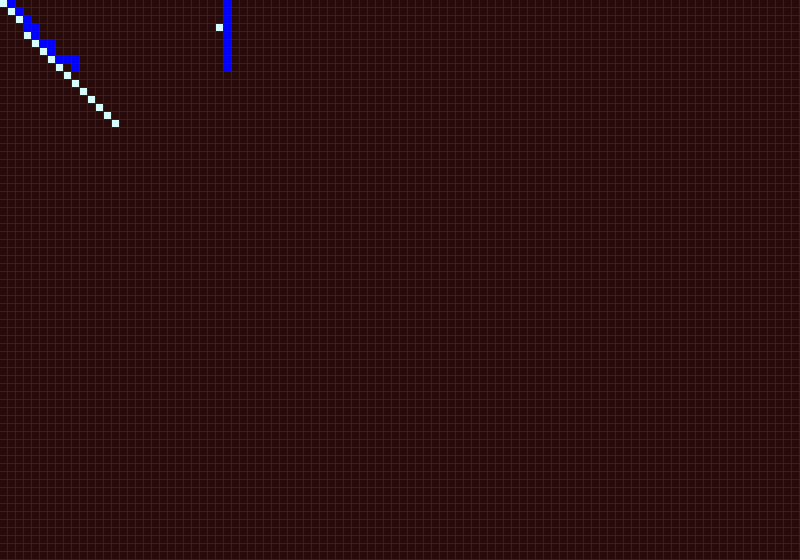

KeyboardInterrupt: ignored

In [25]:
import numpy as np


col_about_to_die = (200, 200, 225)
col_alive = (255, 255, 215)
col_background = (10, 10, 40)
col_grid = (30, 30, 60)
col_red = (255, 0, 0)
world = pygame.display.set_mode([100, 70])

pattern = np.array([[0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0]]);

def update(surface, cur, sz):
    nxt = np.zeros((cur.shape[0], cur.shape[1]))
    for (i,row) in enumerate(pattern):
        for (j,value) in enumerate(row):
            nxt[i,j] = value
    choices = [i for i in range(0,cur.shape[0])]
    move_direction_choices = [-1, 0,1]
    x_y_direction = [-1, 1]
    counter = 0

    for r, c in np.ndindex(cur.shape):
        counter += 1
        #if cur[r, c] == 1: # and num_alive < 2 or num_alive > 3:
        if 1 in cur[r]:
            if cur[r,c] == 1:
                direction = np.random.choice(move_direction_choices)
                x_y_direction_choices = np.random.choice(x_y_direction)
                nxt_r = r
                nxt_c = c

                if not has_neighbors(nxt, r, c) and nxt[r,c] == 1:
                    nxt[r, c] = 0
                    if x_y_direction_choices == -1:
                        nxt_r = (r + direction)%cur.shape[0]
                        if nxt[nxt_r, nxt_c] == 2:
                            nxt_r = (r - direction)%cur.shape[0]
                    else:
                        nxt_c = (c + direction) % cur.shape[1]
                        if nxt[nxt_r, nxt_c] == 2:
                            nxt_c = (c - direction) % cur.shape[1]
                    nxt[nxt_r, nxt_c] = 1
                else:
                    nxt[r,c] = 1
                #nxt_c = (c+direction) % cur.shape[1]
                #nxt_dir = direction
                #if nxt[r, nxt_c] == 2:
                #    nxt_dir = direction
                #    nxt_c = (c + (-1 * direction)) % cur.shape[1]

                #if r != 4:
                #col = col_about_to_die
                #else:
                #    col = col_red

            #if r == c:
            #    nxt[r, c] = 0
            #    nxt[r, (c+1) % cur.shape[1]] = 1
            #    col = col_about_to_die
        #elif (cur[r, c] == 1 and 2 <= num_alive <= 3) or (cur[r, c] == 0 and num_alive == 3):
        elif cur[r,c] == 0:
        #else:
            in_column = False
            for i in range(0, cur.shape[0]):
                if nxt[i, c] == 1:
                    in_column = True
            if 1 not in nxt[r] and not in_column and nxt.sum() < 60:

                pop_row = np.random.choice(choices)
                nxt[r,c] = 1
            #if nxt[r, c-1] == 1:
            #    nxt[r, (c-1)] = 0
            #    nxt[r, c] = 1
            #nxt[r,(c + 2) % cur.shape[1]] = 1
                col = col_alive
        #num_alive = np.sum(cur[r-1:r+2, c-1:c+2]) - cur[r, c]

        #    col = col_red
        #if cur[r, c] == 1 and num_alive < 2 or num_alive > 3:
        #    col = col_about_to_die
        #elif (cur[r, c] == 1 and 2 <= num_alive <= 3) or (cur[r, c] == 0 and num_alive == 3):
        #    nxt[r, c] = 1
        #    col = col_alive

        col = col_alive if cur[r, c] == 1 else col_background if cur[r,c] == 0 else col_red
        #pygame.draw.rect(surface, col, (c*sz, r*sz, sz-1, sz-1))

        pygame.draw.rect(surface, col, (c*sz, r*sz, sz-1, sz-1))

    return nxt

def has_neighbors(neighborhood, r, c):
    for i in [-1, 1]:
        if neighborhood[r + i, c] == 1:
            return True
    for j in [-1, 1]:
        if neighborhood[r, c + j] == 1:
            return True
    return False

def init(dimx, dimy):
  
    cells = np.zeros((dimy, dimx))

    pattern = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0],
                                        [2,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [2,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,2,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]);

    #pattern = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    #                    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    #                    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]);
    pos = (3,3)
    cells[pos[0]:pos[0]+pattern.shape[0], pos[1]:pos[1]+pattern.shape[1]] = pattern
    return cells


def main(dimx, dimy, cellsize):
    pygame.init()
    surface = pygame.display.set_mode((dimx * cellsize, dimy * cellsize))
    pygame.display.set_caption("John Conway's Game of Life")

    cells = init(dimx, dimy)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

        surface.fill(col_grid)
        cells = update(surface, cells, cellsize)
        #cells = update(surface, cells, cellsize)
        pygame.display.update()




        view = pygame.surfarray.array3d(world)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        #img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell every 0.5 seconds
        #cv2_imshow(img_bgr)
        time.sleep(.1)
        output.clear()
        output.clear(wait=True)
        cv2_imshow(view)
if __name__ == "__main__":
    main(100, 70, 8)
    #https://vishnudsharma.medium.com/visualizing-tkinter-and-pygame-in-colab-272c5a245f8c